# Let's draw samples from a nested Gaussian Process

We will draw samples from a $(m, n) = (2, 1)$ nested Gaussian process following [Zhu and Dunson (2013)](http://amstat.tandfonline.com/doi/abs/10.1080/01621459.2013.838568). 

For our first trick, we assume values for the random walk and observation noise variabilities and sample from the state space model

$$\begin{align}
Y_j &\sim Z_j \theta_j + \epsilon_j \\
\theta_{j+1} &= G_j \theta_j + \omega_j \\
\theta &= \begin{bmatrix} U \\ DU \\ A \end{bmatrix} \\
\epsilon_j &\sim \mathcal{N}(0, \sigma^2_\epsilon) \\
\omega_j &\sim \mathcal{N}(0, W_j) \\
Z_j &= 
    \begin{pmatrix} 
    1 & 0 & 0
    \end{pmatrix} \\
G_j &= 
    \begin{pmatrix} 
    1 & \delta_j & \frac{\delta_j^2}{2} \\
    0 & 1 & \delta_j \\
    0 & 0 & 1
    \end{pmatrix} \\
W_j & = 
    \begin{pmatrix}
    \frac{\delta_j^3}{3} \sigma_U^2 + \frac{\delta_j^5}{20} \sigma_A^2 &
    \frac{\delta_j^2}{2} \sigma_U^2 + \frac{\delta_j^4}{8} \sigma_A^2 &
    \frac{\delta_j^3}{6} \sigma_A^2 \\
    \frac{\delta_j^2}{2} \sigma_U^2 + \frac{\delta_j^4}{8} \sigma_A^2 &
    \delta_j \sigma_U^2 + \frac{\delta_j^3}{3} \sigma_A^2 &
    \frac{\delta_j^2}{2} \sigma_A^2 \\
    \frac{\delta_j^3}{6} \sigma_A^2 &
    \frac{\delta_j^2}{2} \sigma_A^2 &
    \delta_j \sigma_A^2
    \end{pmatrix} \\
\theta_0 &\sim \mathcal{N}(0, \mathrm{diag}(\sigma^2_\mu, \sigma^2_\mu, \sigma^2_\alpha))
\end{align}$$

In the above, we take $\delta_j \equiv t_{j + 1} - t_j$ and assume $\sigma^2_\mu$ and $\sigma^2_\alpha$ are specified as part of the prior.

# Implementation

In [1]:
using NGPtools
using PyPlot
plt.style[:use]("ggplot")
srand(12347);

## Set up system matrices and dimensions

In [2]:
Nt = 100
tobs = linspace(0, 1, Nt);

In [3]:
Np = 3
Nm = 3Np

σϵ = 0.7
σA = 50
σU = .25
σμ = 3
σα = 1.

δ = diff(tobs)[1];

## Create fake data

In [4]:
y, α = generate(Np, length(tobs), δ, σϵ, σU, σA, σμ, σα);

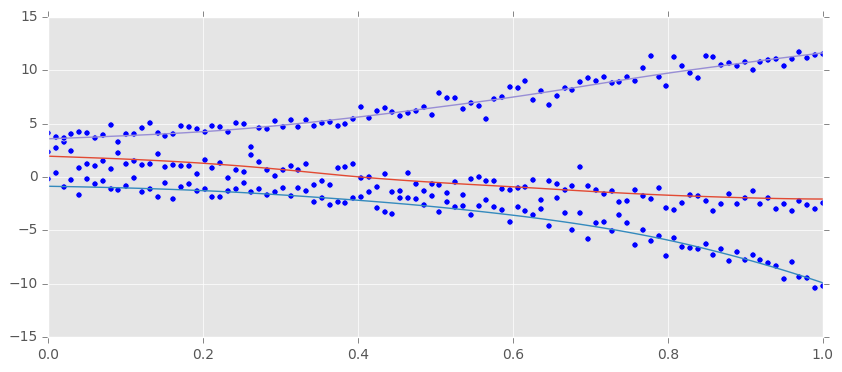

In [5]:
figure(figsize=(10, 4))

for idx in 1:Np
    scatter(tobs, y[idx,:] , label="data");
    plot(tobs, α[idx,:]')
end
xlim(tobs[1], tobs[end]);

In [6]:
Ns = 500  # number of samples

α_samples = sample(y, Ns, Np, length(tobs), δ, σϵ, σU, σA, σμ, σα);

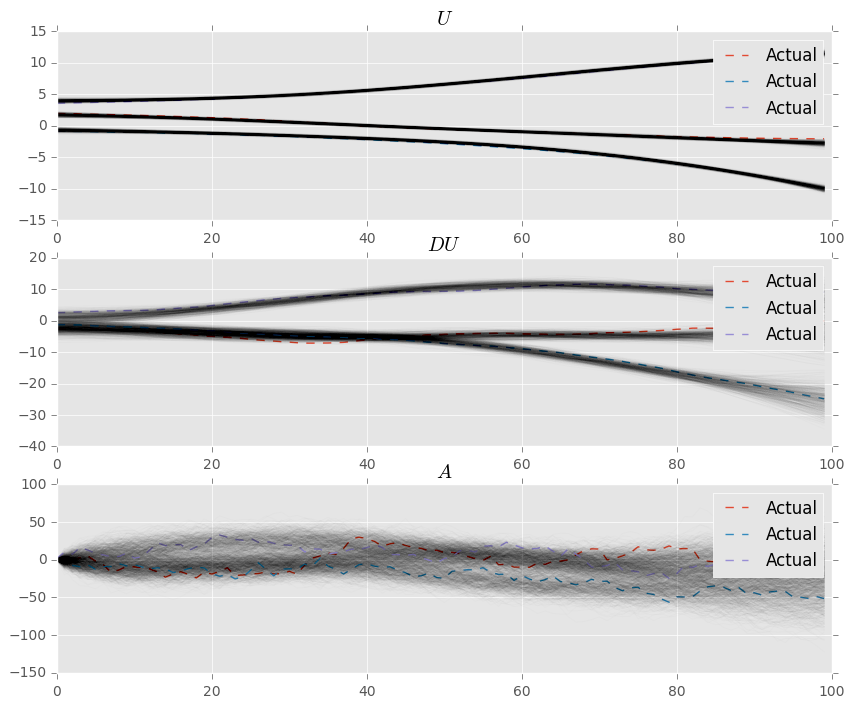

In [7]:
trans = 5 / Ns
figure(figsize=(10, 25))
th_names = [L"U", L"DU", L"A"]

for obs in 1:Np, idx in 1:3
    subplot(Nm, 1, idx)
    plot(α[Np * (idx - 1) + obs, :]', linestyle="--", label="Actual")
    plot(squeeze(α_samples[Np * (idx - 1) + obs, :, :], 1), color="k", alpha=trans)
    title(th_names[idx])
    legend()
end